# CS6140 Assignments

**Instructions**
1. In each assignment cell, look for the block:
 ```
  #BEGIN YOUR CODE
  raise NotImplementedError.new()
  #END YOUR CODE
 ```
1. Replace this block with your solution.
1. Test your solution by running the cells following your block (indicated by ##TEST##)
1. Click the "Validate" button above to validate the work.

**Notes**
* You may add other cells and functions as needed
* Keep all code in the same notebook
* In order to receive credit, code must "Validate" on the JupyterHub server

---

# Assignment 9: Neural Networks

In this assignment we will implement the [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algorithm for a neural network using a computational graph. 

Each node in the network has a reference to is ancestor (not successor nodes), as follows:
![Network configuration](assignment-9.png)

We will be implementing the nodes defined above, including their ```forward``` and ```backward``` passes. In the forward pass, the node reads its input and calculates an ```activation``` which it then retains for the next layer. In the backward pass, the partial derivative of output with respect to a variable is calculated in the ```pderv``` function, recursively through the graph. Nodes are connected by setting the respecitve back pointers in the ```connect``` function.

In [4]:
require './assignment_lib.rb'

rng = Distribution::Normal.rng(0,1, 293891)

def connect src, dst
  dst.back_net[src.name] = src
end

concentric_circle_data = concentric_dataset()
xor_data = xor_dataset(rng)
two_means_data = generate_synthetic_data(rng)
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

## Question 1: Input

Implement the ```Input``` node which contains a single column of a vector. The value of the variable held by an ```Input``` object is set by calling the ```activation``` accessor directly. In previous assignments we specify a row in a dataset as a hash of features, such as the following:

```ruby
row = {"features" => {"x1" => 1.0, "x2" => 3.0}}
```

Now, the ```Input``` node holds the value of a single column. Each node has a name which represents the variable is knows about. The above statement is equivalent to initializing two ```Input``` nodes once as follows:

```ruby
x1 = Input.new "x1"
x2 = Input.new "x2"
```

Each subsequent example sets the activation value directly, as follows:

```ruby
x1.activation = 1.0
x2.activation = 3.0
```

## Question 1.1 (5 points)

Implement the ```forward``` method which calculates the activation and stores it in a member variable.

In [5]:
class Input
  attr_accessor :activation
  attr_reader :back_net
  attr_reader :name
  
  def initialize name    
    @name = name
    @back_net = nil
  end

  def forward
    # BEGIN YOUR CODE 
    @activation
    #END YOUR CODE
  end
end
nil

In [6]:
def test_input_forward
  i = Input.new "x1"
  assert_not_nil i
  assert_nil i.activation

  i.activation = 1.0
  assert_equal 1.0, i.activation

  assert_equal 1.0, i.forward

  i.activation = 2.0
  assert_equal 2.0, i.forward
end
test_input_forward()

## Question 1.2 (5 points)

Implement the ```pderv``` method which calculates partial derivative of the input with respect to ```name```. That is, this method calculates:

$\begin{align}
\frac{\partial x}{\partial \text{name}}
\end{align}$

where $x$ is an ```Input``` object.

There are two possible derivative values here, when the ```name``` is the variable represented by the input node and when it isn't.

In [7]:
class Input
  def pderv name
    # BEGIN YOUR CODE
    
    if name != @name
      return 0.0
    else
      return 1.0
    end
    
    #END YOUR CODE
  end
end

:pderv

In [8]:
def test_input_pderv
  i = Input.new "x"
  i.activation = 7.1
  
  assert_equal 1.0, i.pderv("x")
  assert_equal 0.0, i.pderv("another_variable")
end
test_input_pderv()

## Question 2.1 (5 points)

Implement the $L_2$ loss function assuming that there is an ```incoming``` node whose ```activation``` is known. Feedback is provided by explicitly setting ```feedback```.

In [9]:
class L2Loss
  attr_reader :activation
  attr_reader :back_net
  attr_reader :name
  attr_accessor :feedback

  def initialize
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end
  
  def forward
    # BEGIN YOUR CODE
    @activation = incoming.forward
    @activation
    # END YOUR CODE
  end
end

:forward

In [10]:
def test_l2loss_forward
  l2loss = L2Loss.new
  i = Input.new "x1"
  connect i, l2loss
  
  i.activation = 7.5
  assert_in_delta 7.5, l2loss.forward, 1e-4
  assert_in_delta 7.5, l2loss.activation, 1e-4
end

test_l2loss_forward()

## Question 2.2 (5 points)

Implement the $L_2$ loss fuction based on the ```activation``` and ```feedback```.

In [11]:
class L2Loss
  def loss
    # BEGIN YOUR CODE    
    (@activation - @feedback) **2 / 2
    #END YOUR CODE
  end
end

:loss

In [12]:
def test_l2loss_loss
  l2loss = L2Loss.new
  i = Input.new "x1"
  connect i, l2loss
  
  i.activation = 7.5
  l2loss.forward
  l2loss.feedback = 1.0
  assert_in_delta 21.125, l2loss.loss, 1e-4
end
test_l2loss_loss()

## Question 2.3 (5 points)

Implement the partial derivative function $L_2$ loss fuction based on the ```activation``` and ```feedback```. 

In [13]:
class L2Loss
  def pderv fname
    # BEGIN YOUR CODE
    (@activation - @feedback) * incoming.pderv(fname)
    #END YOUR CODE
  end 
end

:pderv

In [14]:
def test_l2loss_pderv
  l2loss = L2Loss.new
  i = Input.new "x1"
  connect i, l2loss
  
  i.activation = 7.5
  l2loss.forward
  l2loss.feedback = 1.0
  assert_in_delta 6.5, l2loss.pderv("x1"), 1e-4
  assert_in_delta 0.0, l2loss.pderv("some_other_variable"), 1e-4
end
test_l2loss_pderv()

## Question 2.4 (5 points)

Implement log loss, where the activation is assumed to take the sigmoid of the input. The partial derivative uses the same form as in [Assignment 4](assignment-4/assignment-4.ipynb).


In [15]:
class LogLoss
  attr_reader :activation
  attr_reader :back_net
  attr_reader :name
  attr_accessor :feedback

  def initialize
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end

  def forward    
    # BEGIN YOUR CODE
    z = incoming.forward
    sigmoid = 1 / (1 + Math::E ** (-z))
    @activation = sigmoid
    sigmoid
    #END YOUR CODE
  end
  
  def pderv fname    
    # BEGIN YOUR CODE
    feedback = @feedback == -1 ? 0 : 1
    (@activation - feedback) * incoming.pderv(fname)
    #END YOUR CODE
  end
  
  def loss
    # BEGIN YOUR CODE
    feedback = @feedback == -1 ? 0 : 1
    log_loss = - (feedback * Math.log(@activation) + (1 - feedback) * Math.log(1 - @activation))
    log_loss
    #END YOUR CODE
  end
end

:loss

In [16]:
def test_logloss
  logloss = LogLoss.new
  i = Input.new "x1"
  connect i, logloss
  
  i.activation = 0.77
  assert_in_delta 0.6835208937, logloss.forward, 1e-4
  
  logloss.feedback = 1
  assert_in_delta -0.3164791063, logloss.pderv("x1"), 1e-4  
  assert_in_delta 0.3804980545, logloss.loss, 1e-4
end
test_logloss()

## Question 3.1 (5 points)

Implement the Sigmoid activation function. Given the incoming value $x$, the ```forward``` function calculates ```@activation``` as the sigmoid of x, or:

$
\begin{align}
\sigma(x) = \frac{1}{1+ e^{-x}}
\end{align}
$

In the ```pderv``` function, calculate the partial derivative of the activation function and apply the derivative to the ```back_net``` variables. 

In [17]:
class Sigmoid
  attr_reader :activation
  attr_reader :name
  attr_reader :back_net
  
  def initialize name
    @name = name
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end
  
  # BEGIN YOUR CODE
  def forward
    z = incoming.forward
    sigmoid = 1 / (1 + Math::E ** (-z))
    @activation = sigmoid
    @activation
  end
  
  def pderv fname
    pderv = @activation * (1 - @activation) * incoming.pderv(fname)
    pderv
  end
  #END YOUR CODE
end

:pderv

In [18]:
def test_sigmoid
  i = Input.new "x1"
  i.activation = 0.0

  sig = Sigmoid.new "s"
  connect i, sig

  s1 = sig.forward
  assert_in_delta 0.5, s1, 1e-4, "sig(0.5)"
  p1 = sig.pderv "x1"
  assert_in_delta 0.25, p1, 1e-4, "pderv(0.5)"

  
  i.activation = 0.775
  s2 = sig.forward
  assert_in_delta 0.6846015003, s2, 1e-4, "sig(0.775)"
  p2 = sig.pderv "x1"
  assert_in_delta 0.2159222861, p2, 1e-4, "pderv(0.775)"
  
  p3 = sig.pderv "some_other_variable"
  assert_in_delta 0.0, p3, 1e-4, "pderv(other)"
end

test_sigmoid()


## Question 3.2 (5 points)

Implement the ReLU activation function. Given the incoming value $x$, the ```forward``` function calculates ```@activation``` as a function of x, as follows:

$
\begin{align}
\text{ReLU}(x) = \max \left\{ 0, x \right\}
\end{align}
$

In the ```pderv``` function, calculate the partial derivative of the activation function and apply the derivative to the ```back_net``` variables. 

In [19]:
class ReLU
  attr_reader :activation
  attr_reader :name
  attr_reader :back_net
  
  def initialize name
    @name = name
    @back_net = Hash.new
  end
  
  def incoming
    @back_net.values.first
  end

  # BEGIN YOUR CODE
  def forward
    @activation = [incoming.forward, 0.0].max
    @activation
  end
  
  def pderv fname
    (@activation > 0 ? incoming.pderv(fname) : 0.0)
  end
  #END YOUR CODE
end

:pderv

In [20]:
def test_relu
  i = Input.new "x1"
  i.activation = 0.5

  relu = ReLU.new "s"
  connect i, relu

  s1 = relu.forward
  assert_in_delta 0.5, s1, 1e-4, "relu(0.5)"
  p1 = relu.pderv "x1"
  assert_in_delta 1.0, p1, 1e-4, "pderv(0.5)"

  
  i.activation = -0.775
  s2 = relu.forward
  assert_in_delta 0.0, s2, 1e-4, "relu(-0.775)"
  p2 = relu.pderv "x1"
  assert_in_delta 0.0, p2, 1e-4, "pderv(-0.775)"
  
  p3 = relu.pderv "some_other_variable"
  assert_in_delta 0.0, p3, 1e-4, "pderv(other)"
end

test_relu()


## Question 4.1 (5 points)

The ```LinearUnit``` calculates the inner product between the input activations and an internal weight vector. The weight vector is stored as a reference that is common across the whole network. Therefore, each feature name needs to be unique. 

The diagram below shows the network configuration for Logstic Regression. Multiple ```Input``` units are connected to the ```LinearUnit```, which connected to the ```Sigmoid``` activation function. The activation function is then connected to the ```L2Loss``` output node. 

![Network configuration](assignment-9-Page-2.png)

In the ```forward``` function, each input node in the ```back_net``` has an activation. Assume there is a pre-defined weight for the bias.

In [21]:
class LinearUnit
  attr_reader :activation
  attr_reader :back_net
  attr_reader :name
  
  def initialize name, weights
    @name = name
    @weights = weights
    @back_net = Hash.new    
  end

  def n fname
    [@name, fname].join(".")
  end
  
  def forward
    @activation = @weights[n("bias")]
    # BEGIN YOUR CODE
    @back_net.keys.each do |key|
      w = @weights[n(key)]
      @activation += @back_net[key].forward * w
    end 
    # END YOUR CODE
    return @activation
  end
end

:forward

In [22]:
def test_linear_forward
  weights = Hash.new {|h,k| h[k] = 0.7}
  linear = LinearUnit.new("f", weights)
  assert_not_nil linear
  assert_true(linear.back_net.empty?)
  
  i = Input.new "x1"
  i.activation = 0.2
  
  connect i, linear
  assert_same i, linear.back_net["x1"]
  
  assert_in_delta 0.2 * 0.7 + 0.7, linear.forward, 1e-4
  assert_in_delta 0.7, weights["f.x1"], 1e-4
  assert_in_delta 0.7, weights["f.bias"], 1e-4
  assert_equal 2, weights.size

end

test_linear_forward()

## Question 4.2 (5 points)

The partial derivative function for the ```LinearUnit``` has two cases. In the ```pderv_weights``` below, calculate the partial derivative for weight variables.

In [23]:
class LinearUnit
  def pderv_weights name
    # BEGIN YOUR CODE
    @back_net.keys.each do |key|
      if n(key) == name
        return @back_net[key].forward
      end
    end
    str_name = @name.to_s + ".bias"
    if name == str_name
      1.0
    else
      0.0
    end
    #END YOUR CODE
  end
  
  # Placeholder pderv, will be overwritten
  def pderv name
    pderv_weights name
  end
end

:pderv

In [24]:
def test_linear_pderv_weights
  weights = Hash.new {|h,k| h[k] = 0.7}
  linear = LinearUnit.new("f", weights)
  assert_not_nil linear

  i = Input.new "x1"
  i.activation = 0.2  
  connect i, linear

  i.forward
  act = linear.forward

  assert_in_delta 0.2, linear.pderv_weights("f.x1"), 1e-4
  assert_in_delta 1.0, linear.pderv_weights("f.bias"), 1e-4
end
test_linear_pderv_weights()

## Question 4.3 (5 points)

Considering the dataset below, copy **your** ```StochasticGradientDescent``` and train a logistic regression model. Make one change to your trainer in which the learning rate is fixed.

The ```LogisticRegression``` function should implement these steps just like every other model we used:

1. ```forward```: Calls the forward function for the input, linear unit, activation, and output nodes.
1. ```func```: Calculate the total $L_2$ loss under a sigmoid activation function for all examples in the dataset.
1. ```grad```: Calculate the total gradient vector for all parameters in the function. 

Because the implementation above takes one row at a time, it will call the forward operation again in ```func``` and ```grad```.

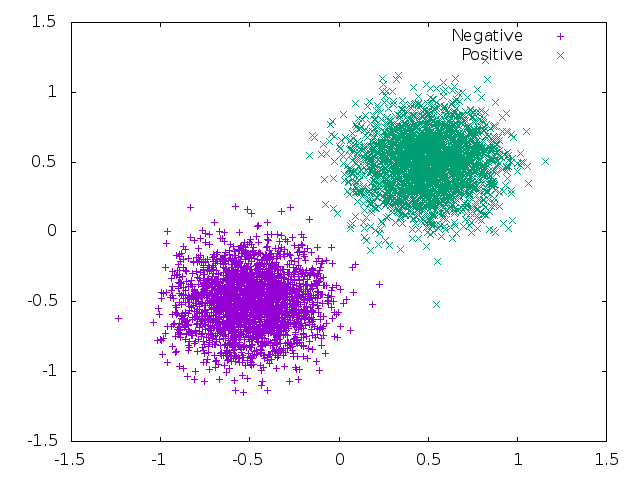

In [25]:
plot_dataset(two_means_data)

In [26]:
class StochasticGradientDescent
  attr_reader :weights
  attr_reader :objective
  def initialize obj, w_0, lr = 0.05
    @objective = obj
    @weights = w_0
    @lr = lr
  end
  def update x
    # BEGIN YOUR CODE
    curr_lr = @lr
    @objective.func(x, @weights)
    grad = @objective.grad(x, @weights)
    update_weights(@weights, grad, curr_lr)
    #END YOUR CODE
  end
  
  def update_weights(w, dw, lr)
    dw.each do |k, v|
      dw[k] *= lr
    end
  
    w.each do |k, v|
      if dw[k] != nil
        w[k] -= dw[k]
      end
    end
    w
  end
end

:update_weights

In [27]:
class LogisticRegression
  def initialize weights
    @x1 = Input.new "x1"
    @x2 = Input.new "x2"
    @inner = LinearUnit.new "wx", weights
    @sig = Sigmoid.new "sig"
    @out = L2Loss.new
    
    connect @x1, @inner
    connect @x2, @inner
    connect @inner, @sig
    connect @sig, @out
  end
  
  def predict dataset
    dataset.collect {|row| forward row}
  end
  
  def forward row
    # BEGIN YOUR CODE
    @x1.activation = row["features"]["x1"]
    @x2.activation = row["features"]["x2"]
    @out.feedback = row["label"]
    @out.forward
    #END YOUR CODE
  end
  
  def func dataset, weights
    # BEGIN YOUR CODE
    initialize weights
    loss_val = 0.0
    size = dataset.size
    dataset.each do |row|
      forward row
      loss_val += @out.loss / size
    end
    loss_val
    #END YOUR CODE
  end
  
  def grad data, weights
    initialize weights
    g = Hash.new {|h,k| h[k] = 0.0}
    data.each do |row|
      forward row
      g["wx.x1"] += @out.pderv("wx.x1")
      g["wx.x2"] += @out.pderv("wx.x2")
      g["wx.bias"] += @out.pderv("wx.bias")
    end
    g
  end
  
  def adjust weights
  end
end

:adjust

In [28]:
def test_logistic_regression data
  cumulative_loss = 0.0
  i = 0
  weights = Hash.new {|h,k| h[k] = 0.0}
  obj = LogisticRegression.new weights
  sgd = StochasticGradientDescent.new obj, weights, 0.001
  5.times do |epoch|
    data.each_slice(20) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts cumulative_loss / i if i % 100 == 0
    end
  end
  
  assert_in_delta 0.4, (cumulative_loss / i), 0.1
  assert_in_delta -0.87, weights["wx.bias"], 0.1
  assert_in_delta 1.61, weights["wx.x1"], 0.1
  assert_in_delta 1.61, weights["wx.x2"], 0.1
  
  return obj
end

trained_lr_model = test_logistic_regression(two_means_data)
nil

0.5809398867628555
0.5455866049591507
0.517534292686858
0.4948298396405443
0.4765866396045478
0.4612083388711856
0.4483265071634056
0.43720106980577794
0.42736656381659544
0.41885422044120196
0.4111601046885304
0.4043625472603398


### Observe
The following plot of the decision boundary should show a higher values for the positive class.

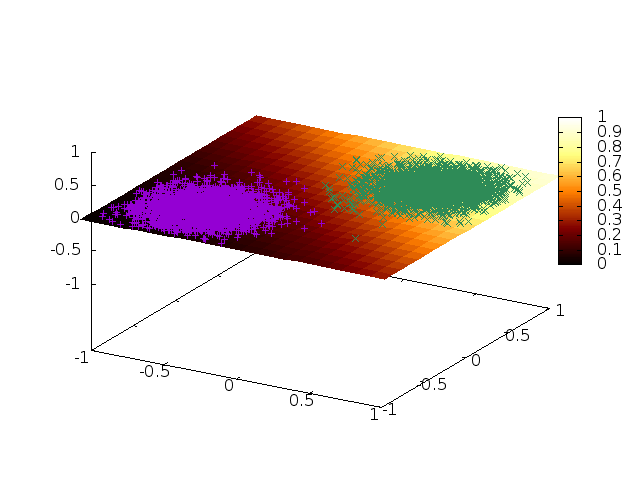

In [29]:
plot_decision_boundary(two_means_data, trained_lr_model)

## Question 5.1 (5 points)

Neural networks connect multiple linear units together. Testing that this works. No additional code needed here, just another test.

In [30]:
def test_hidden_forward
  weights = {
      "h0.x1" => 1.0, "h0.bias" => 0.0,
      "h1.x1" => 2.0, "h1.bias" => 0.0,
      "f0.h0" => 3.0, "f0.h1" => 4.0, "f0.bias" => 0.0
    }
  h0 = LinearUnit.new("h0", weights)
  h1 = LinearUnit.new("h1", weights)
  f0 = LinearUnit.new("f0", weights)
  
  i = Input.new "x1"  
  i.activation = 0.2
  
  connect i, h0
  connect i, h1
  
  connect h0, f0
  connect h1, f0

  i.forward
  h0.forward
  h1.forward
  f0.forward

  assert_in_delta 0.2, h0.activation, 1e-4, "h0"
  assert_in_delta 0.4, h1.activation, 1e-4, "h1"
  assert_in_delta 0.2 * 3 + 0.4 * 4, f0.activation, 1e-4, "f0"
  
end
test_hidden_forward()

## Question 5.2 (5 points)

Implement the backpropagation function for the linear unit when the variable requested is _not_ one of the weights. This function is what makes the backpropagation algorithm work. We will also overwrite the ```pderv``` function here to use the two cases.

In [31]:
class LinearUnit
  def pderv_back name
    # BEGIN YOUR CODE
    res = 0.0
    @back_net.each_pair do |key, value|
      name_s = @name.to_s
      node_s = key.to_s
      key_s = name_s + "." + node_s
      if name == key_s
        value.forward
      else
        res += @weights[key_s] * value.pderv(name)
      end
    end
    res
    #END YOUR CODE
  end
  
  
  def pderv name
    if name.start_with?(@name + ".") and @weights.has_key? name
      pderv_weights name
    else
      pderv_back name
    end
  end
end

:pderv

In [32]:
def test_hidden_backward
  weights = {
      "h0.x1" => 1.5, "h0.bias" => 0.0,
      "h1.h0" => 2.0, "h1.bias" => 0.0,
      "h2.h0" => 3.0, "h2.bias" => 0.0,    
      "h3.h1" => 4.0, "h3.h2" => 5.0, "h3.bias" => 0.0    
  }
  
  h0 = LinearUnit.new("h0", weights)
  h1 = LinearUnit.new("h1", weights)
  h2 = LinearUnit.new("h2", weights)
  h3 = LinearUnit.new("h3", weights)
  
  i = Input.new "x1"  
  i.activation = 0.2
  
  connect i, h0
  
  connect h0, h1
  connect h0, h2
  connect h1, h3
  connect h2, h3

  [i, h0, h1, h2, h3].each {|n| n.forward}

  assert_in_delta 0.2, h0.pderv("h0.x1"), 1e-4, "h0"
  assert_in_delta 0.3, h1.pderv("h1.h0"), 1e-4, "h1"
  assert_in_delta 0.3, h2.pderv("h2.h0"), 1e-4, "h2"
  assert_in_delta 4.0 * (2 * 0.2) + 5 * (3 * 0.2), h3.pderv("h0.x1"), 1e-4, "h3"
  
end
test_hidden_backward()

## Question 5.3 (10 points)

Implement the ```NeuralNetwork``` class following the pattern for the ```LogisticRegression``` above, where there are three main operations: ```forward```, ```func```, and ```grad```. 

Assume that ```layers``` contains all nodes properly connected. Each layer is an array of nodes connected appropriately. Even if there is only one node in the layer, it needs to be in an array.

We will verify that a 1-node neural network produces exactly the same result as the LogisticRegression model above.

In [33]:
class NeuralNetwork
  attr_reader :batch_loss
  def initialize layers
    @inputs = Hash.new
    @layers = layers
    @out = @layers[-1][0]
    @batch_loss = 0.0
  end

  def forward row
    # BEGIN YOUR CODE
    features = row["features"]
    label = row["label"]
    features.each_pair do |feature, value|
      @inputs[feature].activation = value
    end
    @out.feedback = label
    @out.forward
    #END YOUR CODE
  end
    
  def func dataset, weights
    # BEGIN YOUR CODE
    @inputs = update_inputs dataset
    res = 0.0
    size = dataset.size
    dataset.each do |row|
      forward row
      res += @out.loss / size
    end
    res
    #END YOUR CODE
  end
  
  def grad data, weights
    update_inputs data
    g = Hash.new {|h,k| h[k] = 0.0}
    # BEGIN YOUR CODE
    data.each do |row|
      forward row
      #####################bias####################
      @layers[0].each do |node|
        bias_key = node.name.to_s + ".bias"
        g[bias_key] += @out.pderv(bias_key)
        @inputs.keys.each do |key|
          input_key = node.name.to_s + "." + key.to_s
          g[input_key] += @out.pderv(input_key)
        end
      end
      
      ###############normal##################
      upper = @layers.size - 2
      1..upper.times do |i|
        curr_lay = @layers[i]
        prev_lay = @layers[i - 1]
        
        curr_lay.each do |curr|
          bias_key = curr.name.to_s + ".bias"
          g[bias_key] += @out.pderv(bias_key)
          prev_lay.each do |pre|
            input_key = curr.name.to_s + "." + pre.name.to_s
            g[input_key] += @out.pderv(input_key)
          end
        end
      end
    end
    #END YOUR CODE
    g
  end
  
  def predict data
    data.map do |row|
      forward row
    end 
  end
  
  def update_inputs data
    data.flat_map {|r| r["features"].keys}
      .uniq
      .reject {|k| @inputs.has_key? k}
      .each do |k|
        @inputs[k] = Input.new k
        @layers.first.each {|f| connect @inputs[k], f}
      end
    @inputs
  end
  
  def adjust weights
  end
end

:adjust

In [34]:
def test_neural_network_1_layer data
  cumulative_loss = 0.0
  i = 0
  weights = Hash.new {|h,k| h[k] = 0.0}
  layers = [
    [LinearUnit.new("wx", weights)],
    [Sigmoid.new("sig")],
    [L2Loss.new]
  ]
    
  connect layers[0][0], layers[1][0]
  connect layers[1][0], layers[2][0]

  obj = NeuralNetwork.new layers
  sgd = StochasticGradientDescent.new obj, weights, 0.001
  5.times do |epoch|
    data.each_slice(20) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts cumulative_loss / i if i % 100 == 0
    end
  end
  
  assert_in_delta 0.4, (cumulative_loss / i), 0.1
  assert_in_delta -0.87, weights["wx.bias"], 0.1
  assert_in_delta 1.61, weights["wx.x1"], 0.1
  assert_in_delta 1.61, weights["wx.x2"], 0.1
  
  return obj
end

trained_lr_model2 = test_neural_network_1_layer(two_means_data)
nil

0.5699502023724223
0.531954921228386
0.504893601652742
0.48420727295742777
0.4679332440666355
0.4542194954670764
0.44267155916342893
0.4325701868490979
0.4235420296792241
0.4156553577082788
0.40845168729625597
0.40204973678797656


## Question 6.1 (10 points)
Using a 2-layer neural network achieve an $\log$ training loss of less than 0.3 on the XOR dataset. You will initialize a ```problem``` Hash with a weights initializer and the layers. You are free to choose the activation and any layers. We will standardize on the ```LogLoss``` for this dataset, which you will need to add. Don't forget to connect your nodes.

### Practice
You may find the [TensorFlow Neural Network Playgroud](https://playground.tensorflow.org) helpful. It runs in the browser and has all the datasets we are using here.

* [XOR](https://playground.tensorflow.org/#dataset=xor)
* [Concentric Cirles](https://playground.tensorflow.org/#dataset=circle)

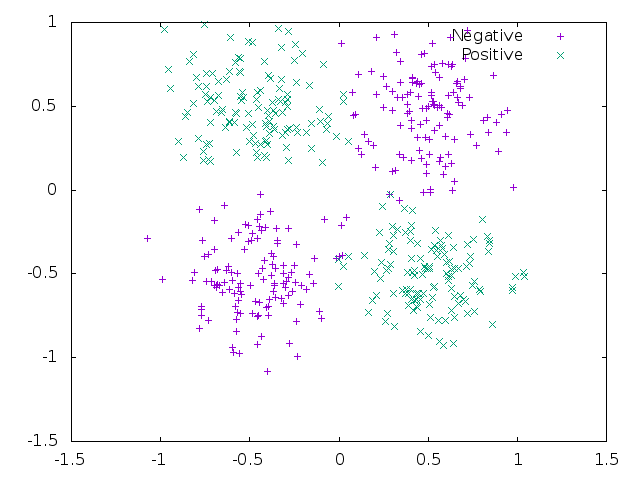

In [35]:
plot_dataset(xor_data)

In [85]:
def create_problem_xor
  rng = Distribution::Normal.rng(0,0.2,293891)
  # BEGIN YOUR CODE
  problem_xor = Hash.new
  weights = Hash.new{|h,k| h[k] = rng.call * 5}
  
  #####################layers#########################
  layers_arr = Array.new()
  layers_arr << [LinearUnit.new("l1_1", weights), LinearUnit.new("l1_2", weights),
    LinearUnit.new("l1_3", weights), LinearUnit.new("l1_4", weights), LinearUnit.new("l1_5", weights)]
  
  layers_arr << [ReLU.new("r1_1"), ReLU.new("r1_2"), ReLU.new("r1_3"), ReLU.new("r1_4"), ReLU.new("r1_5")]
  
  layers_arr << [LinearUnit.new("l2_1", weights), LinearUnit.new("l2_2", weights),
    LinearUnit.new("l2_3", weights), LinearUnit.new("l2_4", weights)]
  layers_arr << [ReLU.new("r2_1"), ReLU.new("r2_2"), ReLU.new("r2_3"), ReLU.new("r2_4")]
  layers_arr << [LinearUnit.new("l3_1", weights)]
  layers_arr << [LogLoss.new]
  
  
  5.times do |i|
    connect layers_arr[0][i], layers_arr[1][i]
  end
  4.times do |i|
    connect layers_arr[2][i], layers_arr[3][i]
    connect layers_arr[3][i], layers_arr[4][0]
  end
  layers_arr[1].each do |l1|
    layers_arr[2].each do |l2|
      connect l1, l2
    end
  end
  connect layers_arr[4][0], layers_arr[5][0]
  
  problem_xor["weights"] = weights
  problem_xor["layers"] = layers_arr
  problem_xor["learning_rate"] = 0.025
  #END YOUR CODE
  return problem_xor
end

:create_problem_xor

In [86]:
def test_neural_network_xor problem, data
  cumulative_loss = 0.0
  i = 0

  obj = NeuralNetwork.new problem["layers"]
  sgd = StochasticGradientDescent.new obj, problem["weights"], problem["learning_rate"]
  500.times do |epoch|
    data.each_slice(10) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts [i, cumulative_loss / i].join("\t") if i % 100 == 0
      break if cumulative_loss / i < 0.3
    end
    break if cumulative_loss / i < 0.3
  end
  
  assert_true(cumulative_loss / i < 0.3)
  
  return obj
end

trained_xor_model = test_neural_network_xor(create_problem_xor(), xor_data)
nil

100	0.44767129049016646
200	0.3667338737263733
300	0.3165253223844556


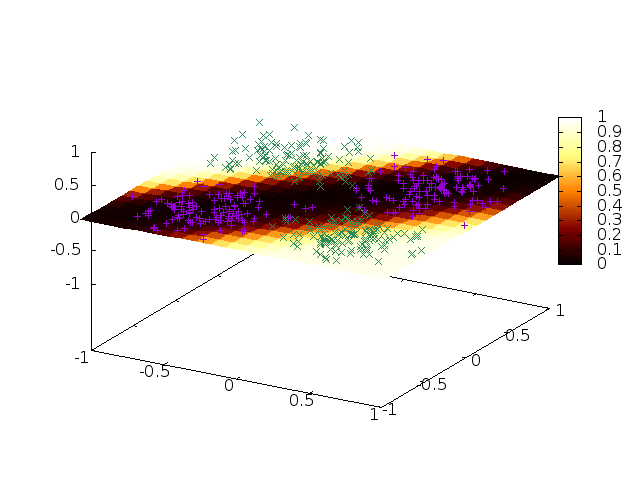

In [87]:
plot_decision_boundary xor_data, trained_xor_model

## Question 6.1 (5 points)
Using a 3-layer neural network achieve an $\log$ training loss of less than 0.2 on the concentric circles dataset. You will initialize a ```problem``` Hash with a weights initializer and the layers. You are free to choose the activation and any layers. We will standardize on the ```LogLoss``` for this dataset, which you will need to add. Don't forget to connect your nodes.

In [ ]:
plot_dataset concentric_circle_data

In [77]:
def create_problem_concentric
  rng = Distribution::Normal.rng(0,0.2,293891)
  # BEGIN YOUR CODE
  problem_concentric = Hash.new
  weights = Hash.new{|h,k| h[k] = rng.call * 5}
  
  #####################layers#########################
  layers_arr = Array.new()
  layers_arr << [LinearUnit.new("l1_1", weights), LinearUnit.new("l1_2", weights),
    LinearUnit.new("l1_3", weights), LinearUnit.new("l1_4", weights), LinearUnit.new("l1_5", weights)]
  
  layers_arr << [ReLU.new("r1_1"), ReLU.new("r1_2"), ReLU.new("r1_3"), ReLU.new("r1_4"), ReLU.new("r1_5")]
  
  layers_arr << [LinearUnit.new("l2_1", weights), LinearUnit.new("l2_2", weights),
    LinearUnit.new("l2_3", weights), LinearUnit.new("l2_4", weights)]
  layers_arr << [ReLU.new("r2_1"), ReLU.new("r2_2"), ReLU.new("r2_3"), ReLU.new("r2_4")]
  layers_arr << [LinearUnit.new("l4_1", weights)]
  layers_arr << [LogLoss.new]
  
  
  5.times do |i|
    connect layers_arr[0][i], layers_arr[1][i]
  end
  4.times do |i|
    connect layers_arr[2][i], layers_arr[3][i]
    connect layers_arr[3][i], layers_arr[4][0]
  end

  layers_arr[1].each do |l1|
    layers_arr[2].each do |l2|
      connect l1, l2
    end
  end
  connect layers_arr[4][0], layers_arr[5][0]
  
  problem_concentric["weights"] = weights
  problem_concentric["layers"] = layers_arr
  problem_concentric["learning_rate"] = 0.01
  #END YOUR CODE
  return problem_concentric
end

:create_problem_concentric

In [78]:
def test_neural_network_concentric problem, data
  cumulative_loss = 0.0
  i = 0

  obj = NeuralNetwork.new problem["layers"]
  sgd = StochasticGradientDescent.new obj, problem["weights"], problem["learning_rate"]
  500.times do |epoch|
    data.each_slice(10) do |batch|    
      sgd.update batch
      cumulative_loss += obj.func(batch, sgd.weights)
      i += 1
      puts [i, cumulative_loss / i].join("\t") if i % 100 == 0
      break if cumulative_loss / i < 0.4
    end
    break if cumulative_loss / i < 0.4
  end
  
  assert_true(cumulative_loss / i < 0.4)
  
  return obj
end

trained_concentric_model = test_neural_network_concentric(create_problem_concentric(), concentric_circle_data)
nil

100	0.5650485972906626
200	0.5270525048922423
300	0.5025526886480306
400	0.47761475679933807
500	0.45202268266361884
600	0.42826730840273314
700	0.4042560653485944


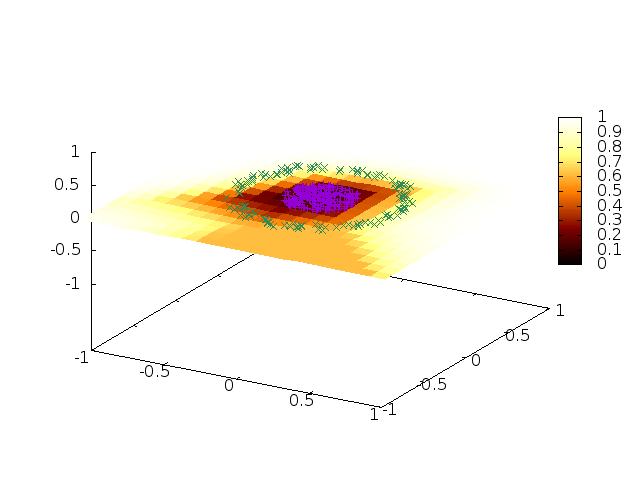

In [79]:
plot_decision_boundary(concentric_circle_data, trained_concentric_model)